In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
import tensorflow as tf
import seaborn as sns

In [4]:
mnist=tf.keras.datasets.mnist
(X_train_full,y_train_full),(X_test,y_test) = mnist.load_data()

In [17]:
X_train_full[5000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [58]:
X_valid,X_train = X_train_full[:5000]/255.,X_train_full[5000:]/255.
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]

X_test=X_test/255


<function matplotlib.pyplot.show(close=None, block=None)>

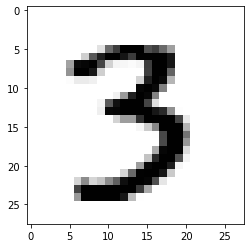

In [27]:
plt.imshow(X_train[5000],cmap="binary")
plt.axis('on')
plt.show

<AxesSubplot:>

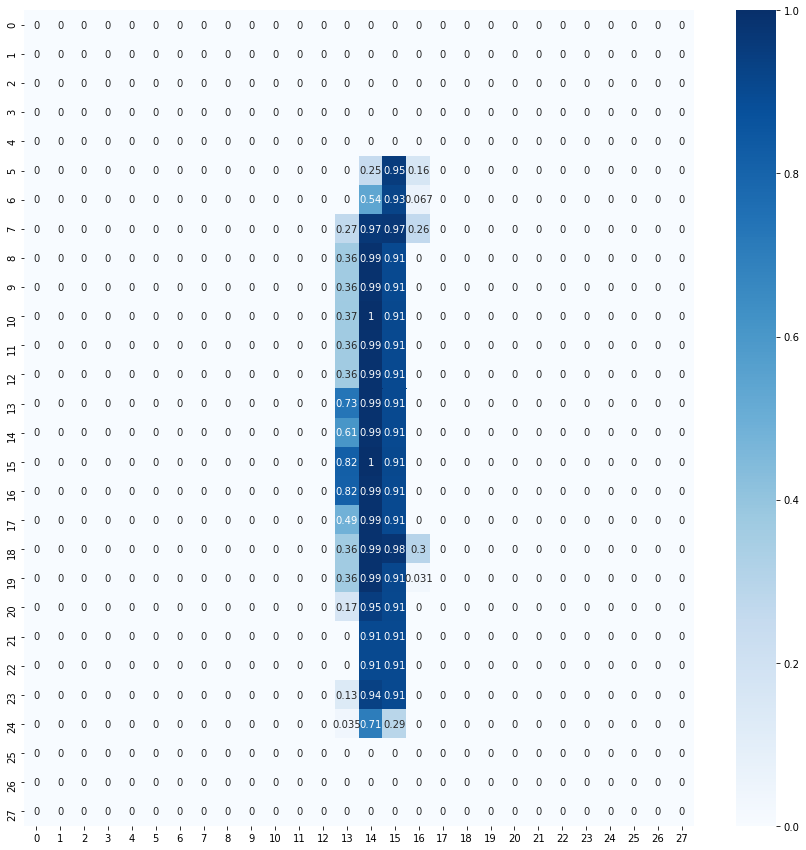

In [34]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[9000],annot=True,cmap="Blues")

In [35]:
y_train.shape

(55000,)

In [36]:
X_train.shape

(55000, 28, 28)

In [44]:
LAYERS=[tf.keras.layers.Flatten(input_shape=[28,28],name="inputlayer"),
       tf.keras.layers.Dense(300,activation="relu",name="seclayer"),
       tf.keras.layers.Dense(100,activation="relu",name="3layer"),
       tf.keras.layers.Dense(10,activation="softmax",name="o/P")]
del_clf=tf.keras.models.Sequential(LAYERS)

In [45]:
del_clf.layers

In [46]:
del_clf.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputlayer (Flatten)         (None, 784)               0         
_________________________________________________________________
seclayer (Dense)             (None, 300)               235500    
_________________________________________________________________
3layer (Dense)               (None, 100)               30100     
_________________________________________________________________
o/P (Dense)                  (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [53]:
summa=del_clf.layers[3]
summa.name

'o/P'

In [54]:
summa.get_weights()

[array([[-1.93563849e-02,  2.18318105e-01, -3.87842506e-02,
          3.97990644e-02, -8.17199796e-02,  2.23057359e-01,
          1.35911167e-01, -5.23641706e-04, -3.94591838e-02,
          2.15336859e-01],
        [-1.56895936e-01, -1.11241661e-01, -6.67139888e-04,
          2.23905921e-01,  6.23932779e-02, -1.77659690e-01,
         -1.22853212e-01,  1.35934561e-01, -1.74807280e-01,
         -1.97778642e-01],
        [ 6.77762330e-02,  1.45943552e-01, -3.05099338e-02,
          1.50707811e-01,  5.30059338e-02,  1.35958880e-01,
         -1.26853287e-01,  1.25538826e-01,  7.57830441e-02,
         -1.06626019e-01],
        [ 1.22570843e-01,  1.77863747e-01,  1.30022675e-01,
         -1.87497064e-01,  1.30036145e-01, -1.39683157e-01,
         -1.30012929e-01, -9.68461633e-02, -1.58710569e-01,
          9.76440907e-02],
        [ 7.44559765e-02,  8.02384317e-02,  6.62001371e-02,
         -1.45467907e-01,  2.13280290e-01,  2.09486842e-01,
          1.34336472e-01,  1.89017981e-01,  2.120358

In [63]:
LOSS_Function="sparse_categorical_crossentropy"
OPTIMIZER="ADAM"
METRICES=["accuracy"]
del_clf.compile(loss=LOSS_Function,
               optimizer=OPTIMIZER,
               metrics=METRICES)
#tf.losses.spa
#tf.keras,optimizers

In [64]:
EPOCHS=30
VALIDATION_SET=(X_valid,y_valid)
History=del_clf.fit(X_train,y_train,epochs=EPOCHS,
                   validation_data=VALIDATION_SET)

Epoch 1/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.1044 - accuracy: 0.9666 - val_loss: 0.1053 - val_accuracy: 0.9706
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0678 - accuracy: 0.9780 - val_loss: 0.0902 - val_accuracy: 0.9734
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0542 - accuracy: 0.9819 - val_loss: 0.0708 - val_accuracy: 0.9800
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0396 - accuracy: 0.9870 - val_loss: 0.0859 - val_accuracy: 0.9772
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0341 - accuracy: 0.9888 - val_loss: 0.0811 - val_accuracy: 0.9800
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0291 - accuracy: 0.9907 - val_loss: 0.0855 - val_accuracy: 0.9798
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0246 - accuracy: 0.9918 - val_loss: 0.0845 - val_accuracy:

In [70]:
import time
import os
unique_path=del_clf.save("Users")

INFO:tensorflow:Assets written to: Users\assets
